# Comparing the different experiments to see if exp5 is actually best

For reference, experiment 5 was run with the train_r3d18_asl100_5.py script. This used the train_run_r3d18_1 function. experiment 6 and 7, both used the new way, running the train.py script (run_2 function) with the parameters:
'r3d18 -s asl100 -e 7' and 'r3d18 -s asl100 -e 8' repectively.
Experiment 9 was run with the old train_r3d18_asl100_5.py from an earlier point in the dag, (see branch missing_val_ac). Experiment 10 was then run with the train_r3d18_asl100_5.py script (train_run_r3d18_1 function) as it currently stands in the repo. 



In [1]:
import torch
import test
from configs import Config
from torchvision.transforms import v2
from video_dataset import VideoDataset
import os
from torch.utils.data import DataLoader
from models.pytorch_r3d import Resnet3D18_basic
import json
import utils
import torch
import gc
import torch.nn.functional as F

2025-08-04 12:42:39.946919: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 12:42:40.164927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-04 12:42:40.246467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-04 12:42:40.265500: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-04 12:42:40.396102: I tensorflow/core/platform/cpu_feature_guar

In [2]:
torch.manual_seed(42)
model = 'r3d18'
split = 'asl100'
# exp_no = '6'.zfill(3)
exps = [str(i).zfill(3) for i in [5, 6, 7, 8, 9, 10]]

root = '../data/WLASL2000'
labels=f'./preprocessed/labels/{split}'
# output=f'runs/{split}/{model}_exp{exp_no}'
outputs = [f'runs/{split}/{model}_exp{exp_no}' for exp_no in exps ]
# config_path = f'./configfiles/{split}/{model}_{exp_no}.ini'
config_paths = [f'./configfiles/{split}/{model}_{exp_no}.ini' for exp_no in exps]
# configs = Config(config_path)
# configs = [Config(config_path) for config_path in config_paths]

model_dict='best.pth'
classes_path = './wlasl_class_list.json'
label_suffix='_fixed_frange_bboxes_len.json'
# title = f'''Testting {model} on split {split} 
#               Experiment no: {exp_no} 
#               Raw videos at: {root}
#               Labels at: {labels}
#               Saving files to: {output}
#               Model weights: {model_dict}
#               {str(configs)}
#               \n
#           '''
titles = [f'''Testting {model} on split {split} 
              Experiment no: {exp_no} 
              Raw videos at: {root}
              Labels at: {labels}
              Saving files to: {output}
              Model weights: {model_dict}
              \n
          ''' for exp_no, output in zip(exps, outputs)
        ]          
          
for title in titles:
  print(title)

Testting r3d18 on split asl100 
              Experiment no: 005 
              Raw videos at: ../data/WLASL2000
              Labels at: ./preprocessed/labels/asl100
              Saving files to: runs/asl100/r3d18_exp005
              Model weights: best.pth
              

          
Testting r3d18 on split asl100 
              Experiment no: 006 
              Raw videos at: ../data/WLASL2000
              Labels at: ./preprocessed/labels/asl100
              Saving files to: runs/asl100/r3d18_exp006
              Model weights: best.pth
              

          
Testting r3d18 on split asl100 
              Experiment no: 007 
              Raw videos at: ../data/WLASL2000
              Labels at: ./preprocessed/labels/asl100
              Saving files to: runs/asl100/r3d18_exp007
              Model weights: best.pth
              

          
Testting r3d18 on split asl100 
              Experiment no: 008 
              Raw videos at: ../data/WLASL2000
              Labels at

In [3]:
# test.run_test_r3d18_1(configs,
#                       root=root,
#                       output=output,
#                       labels=labels,
#                       model_dict=model_dict,
#                       save=True)

for output in outputs:
  print(f'Model weights: {output}')
  test.run_test_r3d18_1(root=root,
                      output=output,
                      labels=labels,
                      model_dict=model_dict,
                      save=True)

Model weights: runs/asl100/r3d18_exp005


/home/luke/ExtraStorage/WLASL/lukes-code/test.py:211: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  r3d18_dict = torch.load(os.path.join(output,'checkpoints', model_dict)) #

Using device: cuda


Testing: 100%|██████████| 258/258 [00:27<00:00,  9.34it/s]


top-k average per class acc: 0.6218333333333333, 0.8483333333333333, 0.8916666666666667
Model weights: runs/asl100/r3d18_exp006
Using device: cuda


Testing: 100%|██████████| 258/258 [00:27<00:00,  9.48it/s]


top-k average per class acc: 0.6123333333333334, 0.8683333333333333, 0.9125
Model weights: runs/asl100/r3d18_exp007
Using device: cuda


Testing: 100%|██████████| 258/258 [00:27<00:00,  9.34it/s]


top-k average per class acc: 0.6085, 0.8625, 0.8958333333333333
Model weights: runs/asl100/r3d18_exp008
Using device: cuda


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.73it/s]


top-k average per class acc: 0.6318333333333334, 0.8375, 0.8883333333333333
Model weights: runs/asl100/r3d18_exp009
Using device: cuda


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.72it/s]


top-k average per class acc: 0.6051666666666667, 0.8416666666666667, 0.92
Model weights: runs/asl100/r3d18_exp010
Using device: cuda


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.73it/s]

top-k average per class acc: 0.648, 0.8633333333333333, 0.9208333333333333


In [4]:
gc.collect()
torch.cuda.empty_cache()
print(f"GPU memory: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")

GPU memory: 0.01 GB


### Fairly interesting results, as it seems while weights 8 perform better on the test data (by about 1%) they perform worse on the validation data

In [5]:
#setup transforms
base_mean = [0.43216, 0.394666, 0.37645]
base_std = [0.22803, 0.22145, 0.216989]

r3d18_final = v2.Compose([
  v2.Lambda(lambda x: x.float() / 255.0),
  # v2.Lambda(lambda x: vt.normalise(x, base_mean, base_std)),
  v2.Normalize(mean=base_mean, std=base_std),
  v2.Lambda(lambda x: x.permute(1,0,2,3)) 
])

test_transforms = v2.Compose([v2.CenterCrop(224),
                              r3d18_final])


#setup data
test_instances = os.path.join(labels, 'test_instances_fixed_frange_bboxes_len.json')
test_classes = os.path.join(labels, 'test_classes_fixed_frange_bboxes_len.json')

test_set = VideoDataset(root, test_instances, test_classes,
                        transforms=test_transforms, num_frames=32)
test_loader = DataLoader(test_set, batch_size=1,shuffle=False,
                          num_workers=0)
num_classes = len(set(test_set.classes))
print(num_classes)

100


In [6]:

results = []
for output in outputs:
  #setup model
  print(f"Model: {output}")
  r3d18 = Resnet3D18_basic(num_classes=num_classes)
  r3d18_dict = torch.load(os.path.join(output,'checkpoints', model_dict), weights_only=True)
  # print(r3d18_dict)
  r3d18.load_state_dict(r3d18_dict)
  r3d18.cuda()
  r3d18.eval()

  accuracy, class_report = test.test_model(r3d18, test_loader)
  results.append((accuracy, class_report))
  print(f'Accuracy score: {accuracy}')
  del r3d18

gc.collect()
torch.cuda.empty_cache()

Model: runs/asl100/r3d18_exp005


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.76it/s]


Accuracy score: 0.6162790697674418
Model: runs/asl100/r3d18_exp006


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.70it/s]


Accuracy score: 0.6085271317829457
Model: runs/asl100/r3d18_exp007


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.72it/s]


Accuracy score: 0.6007751937984496
Model: runs/asl100/r3d18_exp008


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.75it/s]


Accuracy score: 0.6317829457364341
Model: runs/asl100/r3d18_exp009


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.69it/s]


Accuracy score: 0.6085271317829457
Model: runs/asl100/r3d18_exp010


Testing: 100%|██████████| 258/258 [00:26<00:00,  9.71it/s]


Accuracy score: 0.6356589147286822


### This is at least quite promissing, as it suggests the best weights are at least in exp8 or 10. Which were essentially tests to try reproduce exp5. Weirdly though, we would think that exp9 would have been in this bracket, as it is should have been a close approx of exp 5. This indicates, that perhaps the issue is non determinism, however this is still surprising given the disparity in val acc 


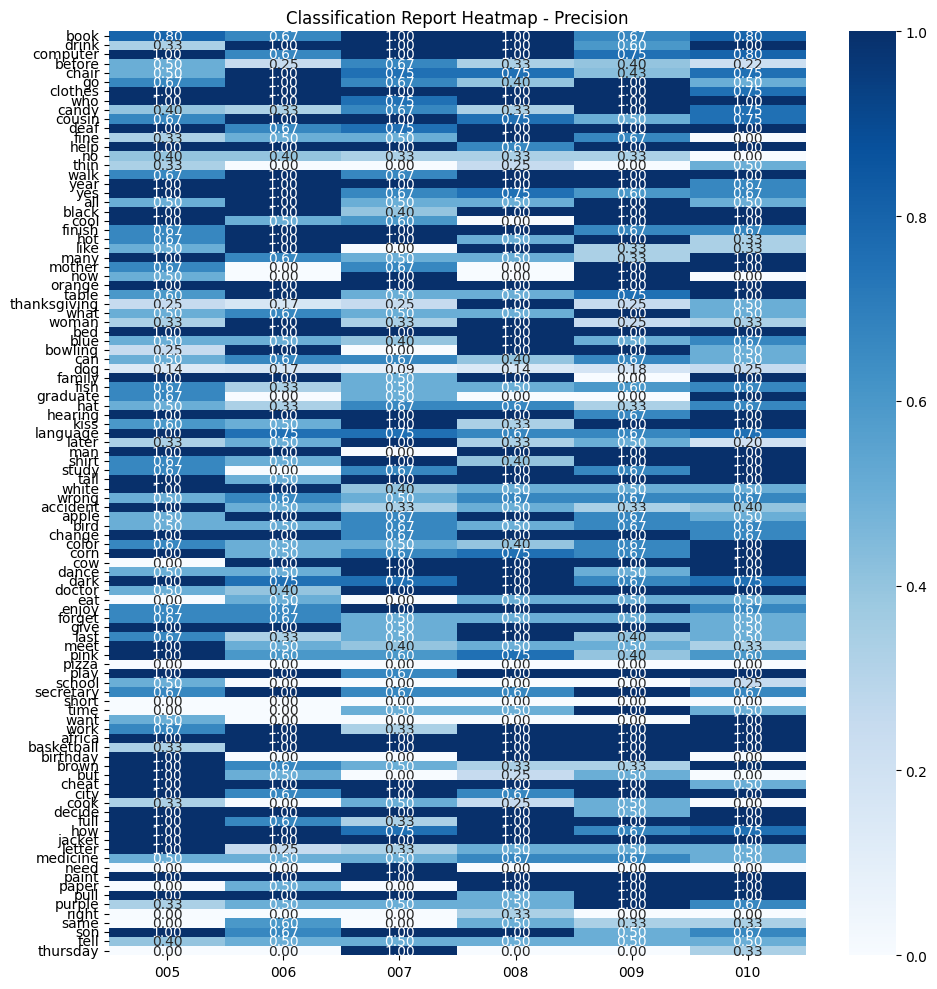

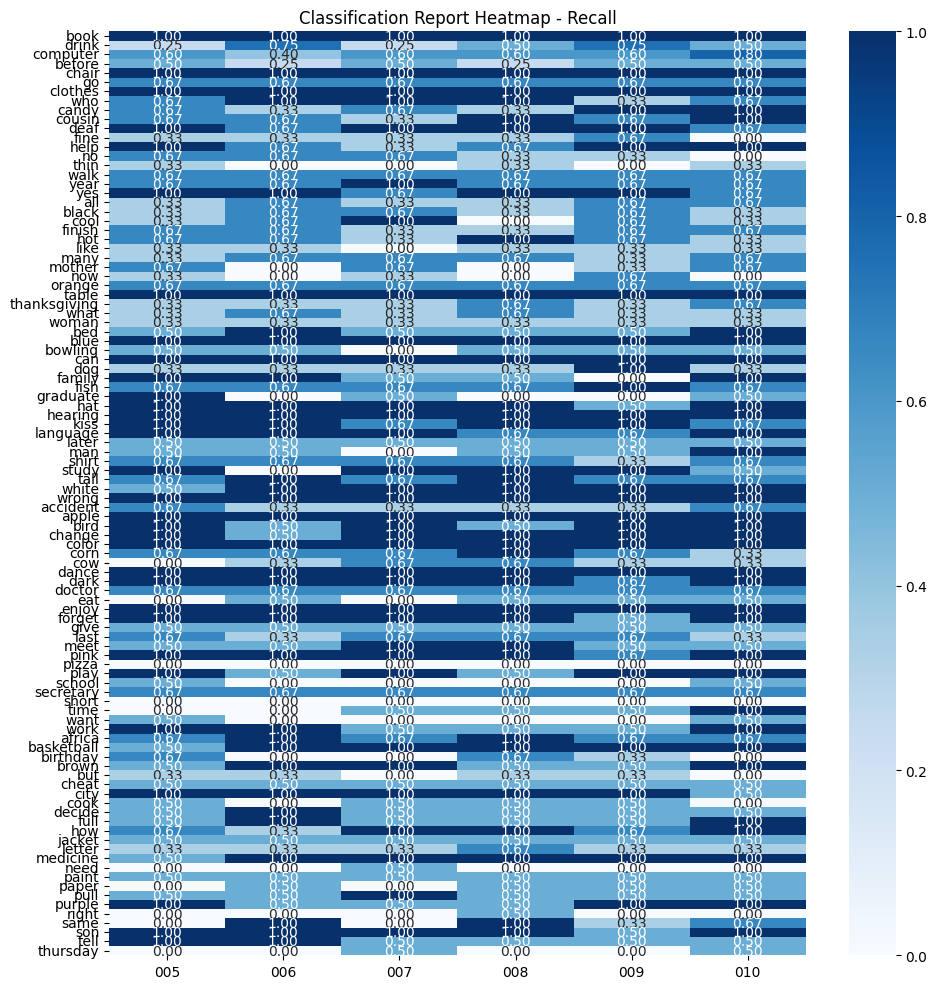

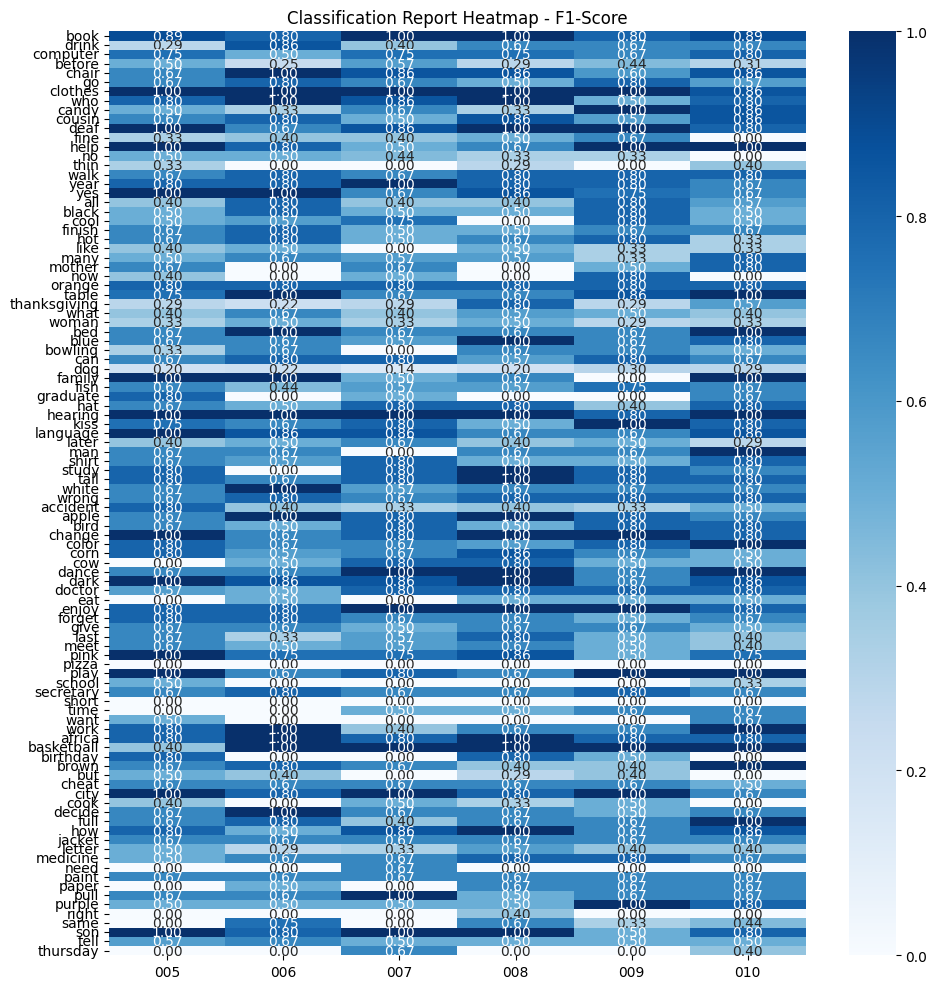

In [7]:
# for i, (accuracy, class_report) in enumerate(results):
#   print(f"Model :{i+5}") 
#   test.plot_heatmap(class_report, classes_path)
reports = [r for _, r in results]
for metric in ['precision', 'recall', 'f1-score']:
  test.plot_heatmap_reports_metric(reports, classes_path, metric, exps)


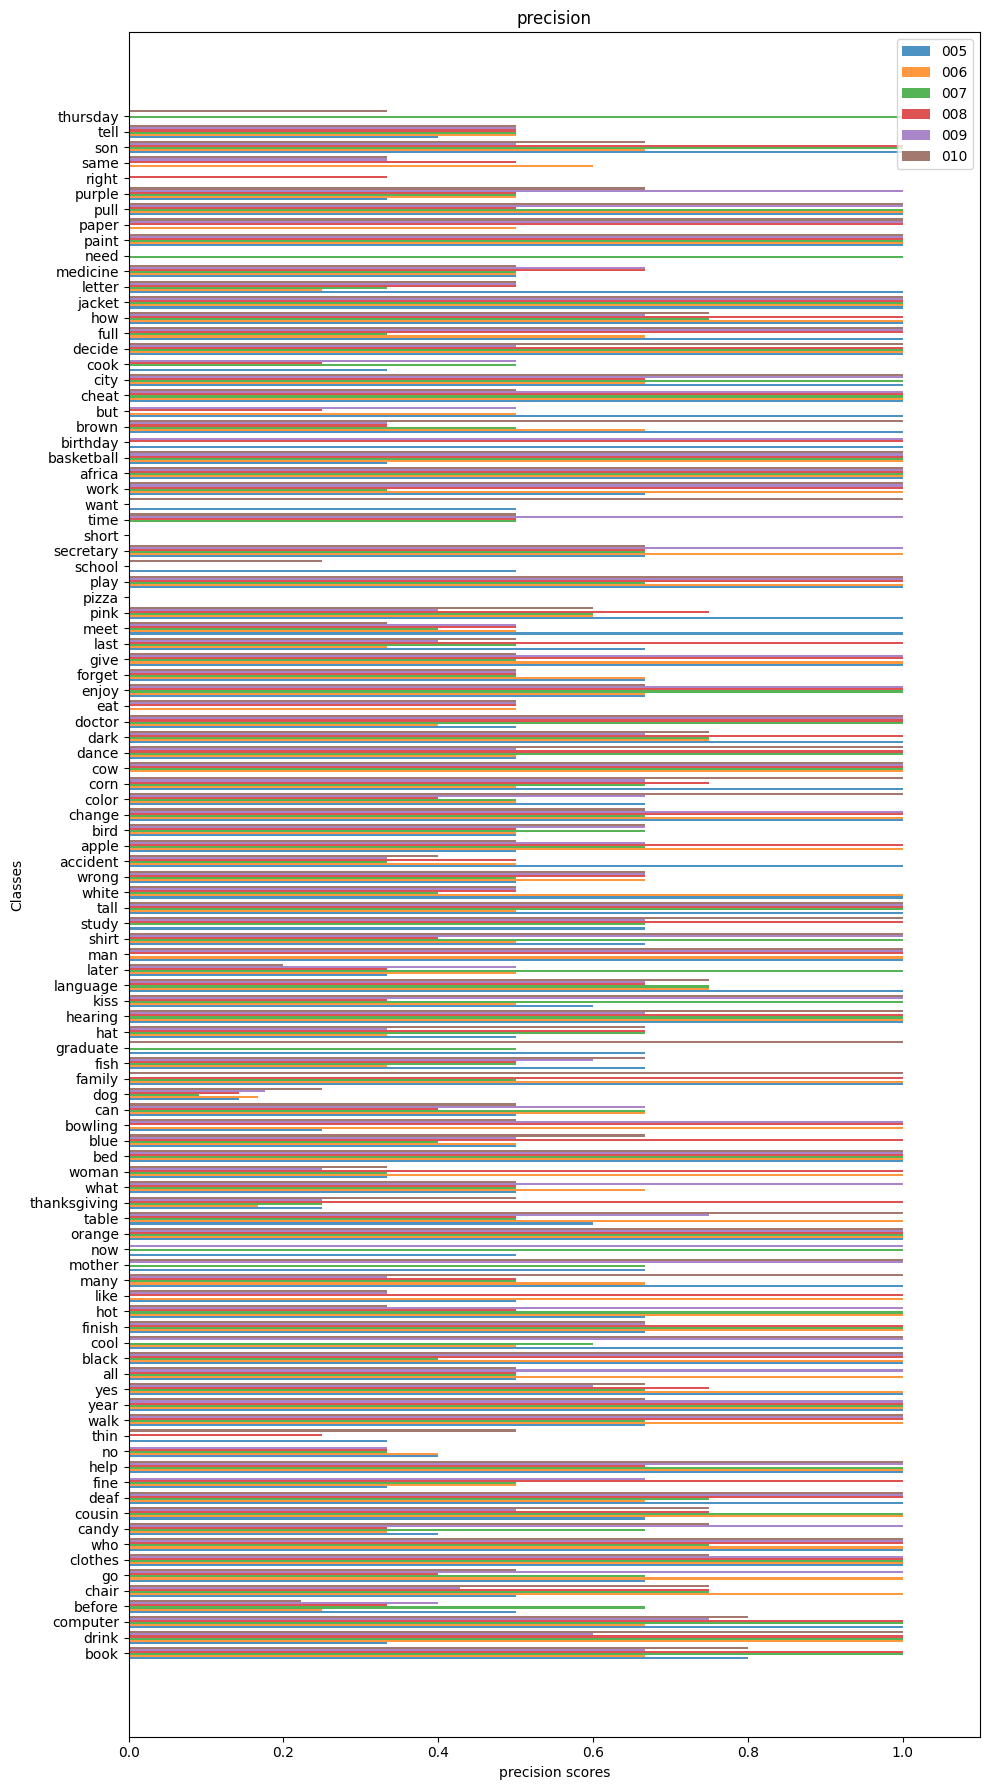

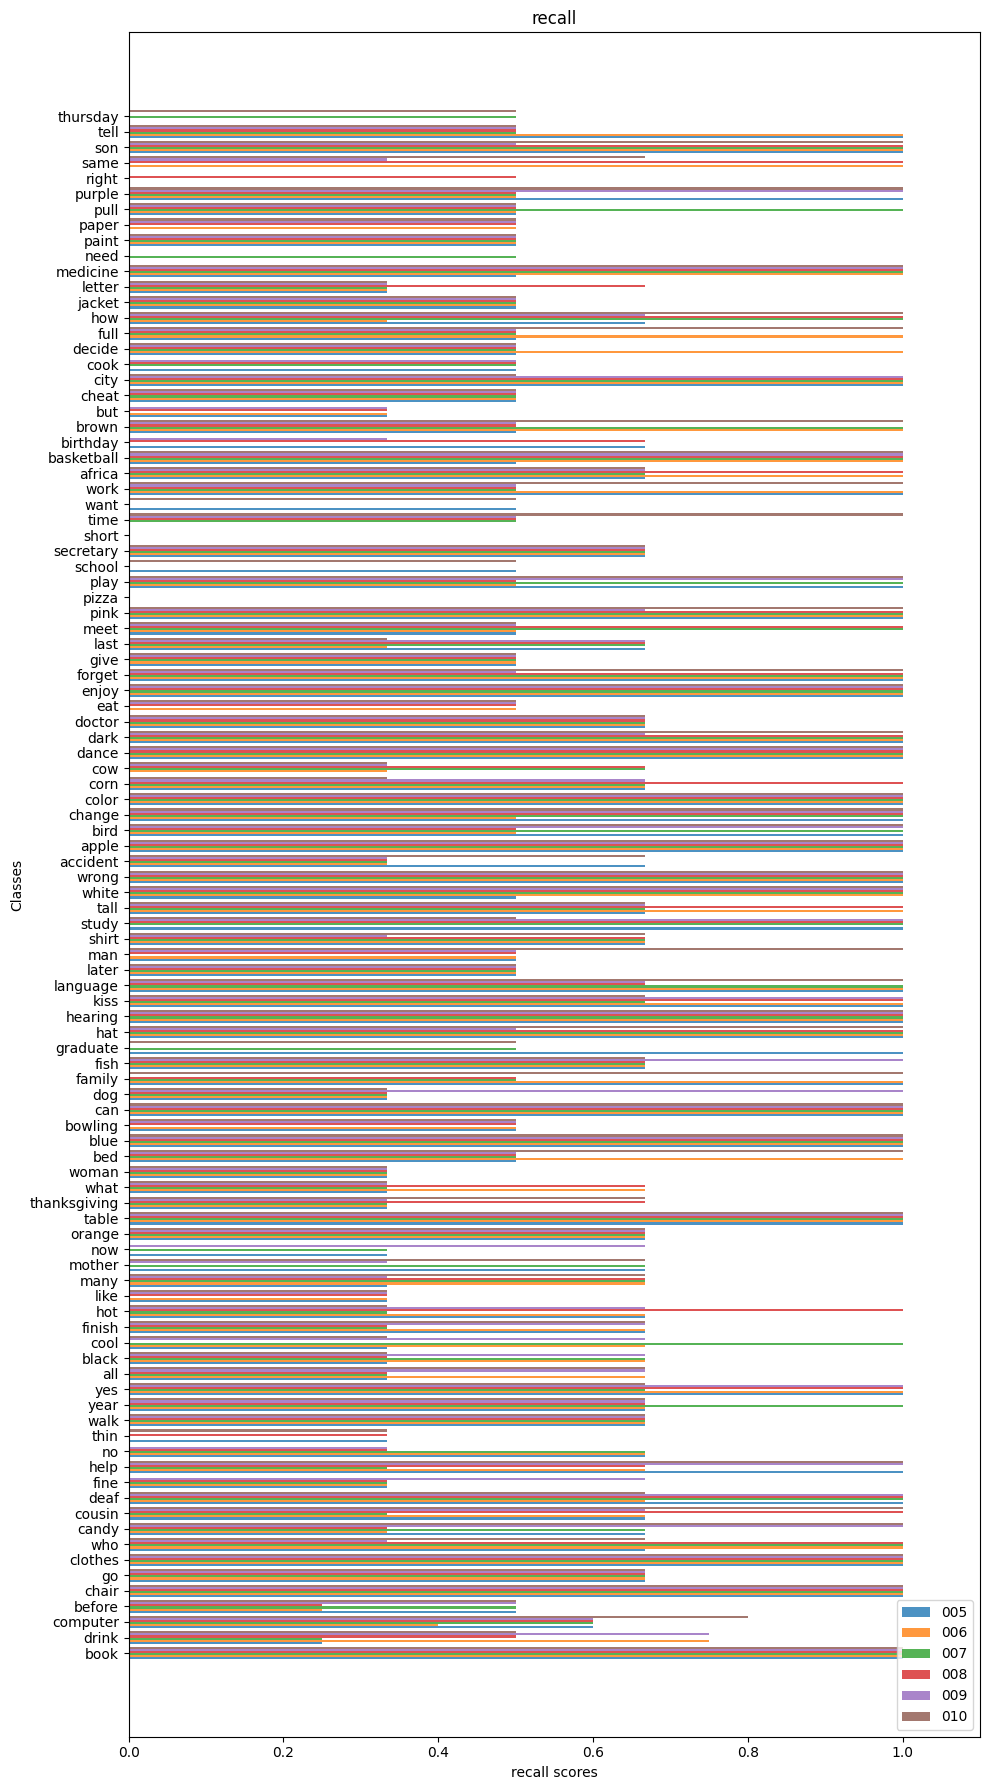

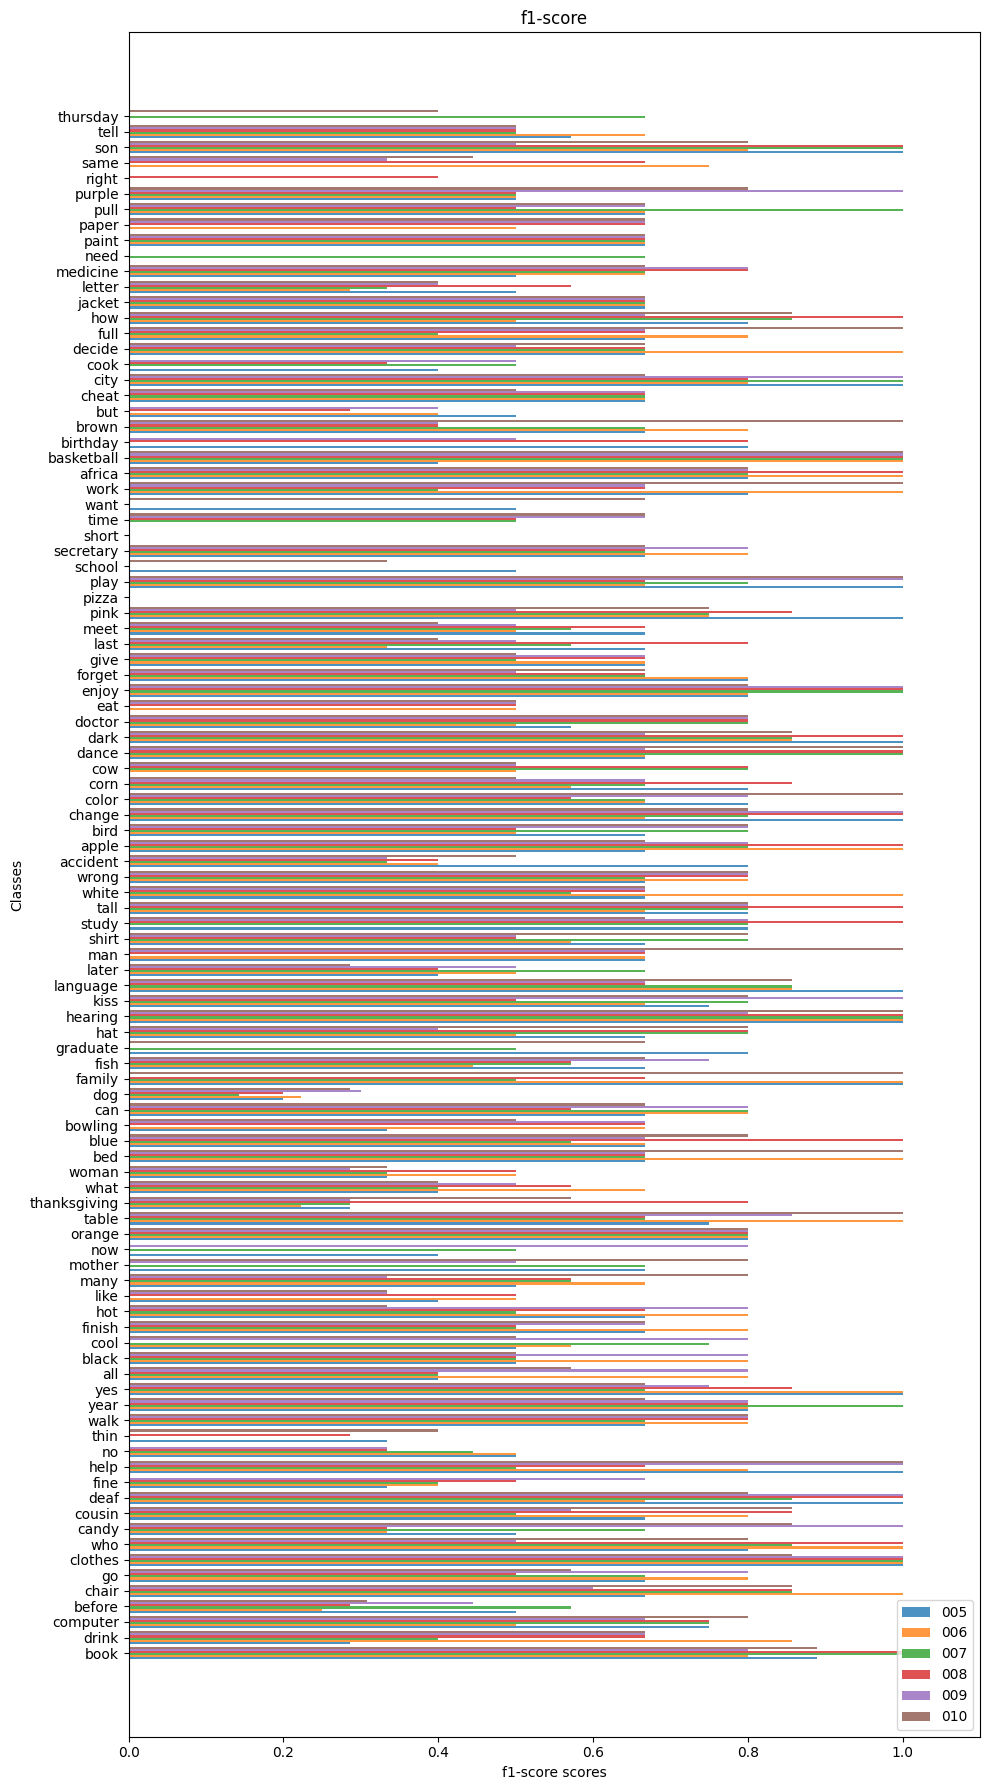

In [8]:
# test.plot_bar_graph(class_report, classes_path)
# for i, (accuracy, class_report) in enumerate(results):
#   print(f"Model :{i+5}") 
#   test.plot_bar_graph(class_report, classes_path)
for metric in ['precision', 'recall', 'f1-score']:
  test.plot_bar_graph_reports_metric(reports, classes_path, metric, exps)

### Quite interesting as it seems the models have learned some different features. For example, while not performing amazingly, exp7 (and to a lesser extent exp10) have managed to learn thursday, while all other experiments fail entirely.

Also similarly interesting, they show general trends for specific words. Such as they all still can't get pizza, and struggle with dog. 

### Visualising what each model predicts when seeing the sign 'thursday'

In [9]:
with open(classes_path, 'r') as f:
  class_list = json.load(f)
print(class_list[99])

thursday


In [10]:
print(test_set.classes[-10:])

['right', 'same', 'same', 'same', 'son', 'son', 'tell', 'tell', 'thursday', 'thursday']


In [11]:
print(len(test_set))

258


In [12]:
thurs1 = test_set.data[256]
thurs2 = test_set.data[257]
def print_dict(dic):
  print("{")
  for key, value in dic.items():
    print(f"'{key}': {value}")
  print("}")  
print_dict(thurs1)
print_dict(thurs2)
frames1 = test_set.__manual_load__(thurs1)
frames2 = test_set.__manual_load__(thurs2)
utils.watch_video(frames1)
utils.watch_video(frames2)

{
'label_num': 99
'frame_end': 46
'frame_start': 1
'video_id': 58359
'bbox': [51, 41, 212, 222]
}
{
'label_num': 99
'frame_end': 92
'frame_start': 0
'video_id': 70026
'bbox': [61, 30, 199, 235]
}


### what does the model think

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
item = test_set.__getitem__(256)
item1 = test_set.__getitem__(257)
frames = item['frames']
frames1 = item1['frames']
frames, frames1 = frames.to(device), frames1.to(device)


cuda


In [14]:
results = []
y_true_all = []
y_pred_all = []

for output in outputs:
  #setup model
  print(f"Model: {output}")
  r3d18 = Resnet3D18_basic(num_classes=num_classes)
  r3d18_dict = torch.load(os.path.join(output,'checkpoints', model_dict), weights_only=True)
  r3d18.load_state_dict(r3d18_dict)
  r3d18.cuda()
  r3d18.eval()
  
  model_predictions = []
  
  with torch.no_grad():
    out = r3d18(frames.unsqueeze(0))
    out1 = r3d18(frames1.unsqueeze(0))
    
    pred_class = torch.argmax(out, dim=1)
    pred_class1 = torch.argmax(out, dim=1)
    
    model_predictions.extend([pred_class.cpu().numpy(), pred_class1.cpu().numpy()])
    
    if len(y_true_all) == 0: #do this once
      y_true_all.extend([item['label_num'], item1['label_num']])
      
    probs = F.softmax(out, dim=1)
    probs1 = F.softmax(out1, dim=1)
    
    print(f"Item thurs1 - True class: {class_list[item['label_num']]}, Predicted: {class_list[pred_class.item()]}")
    print(f"Item thurs2 - True class: {class_list[item1['label_num']]}, Predicted: {class_list[pred_class1.item()]}")

    # Get confidence
    confidence = torch.max(probs, dim=1)[0]
    confidence1 = torch.max(probs1, dim=1)[0]

    print(f"Item 256 confidence: {confidence.item():.3f}")
    print(f"Item 257 confidence: {confidence1.item():.3f}")
    print()
    print('-'*10)
    print()
  
  y_pred_all.append(model_predictions)
  
  results.append({
    'model_name': output,
    'predictions': model_predictions,
    'confidences': [confidence.cpu().numpy(), confidence1.cpu().numpy()]
  })
  print(f"GPU memory before clean: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
  del r3d18, r3d18_dict, out, out1, probs, probs1
  torch.cuda.empty_cache()
  print(f"GPU memory after clean: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
  
gc.collect()

Model: runs/asl100/r3d18_exp005
Item thurs1 - True class: thursday, Predicted: dog
Item thurs2 - True class: thursday, Predicted: dog
Item 256 confidence: 0.952
Item 257 confidence: 0.722

----------

GPU memory before clean: 0.30 GB
GPU memory after clean: 0.04 GB
Model: runs/asl100/r3d18_exp006
Item thurs1 - True class: thursday, Predicted: dog
Item thurs2 - True class: thursday, Predicted: dog
Item 256 confidence: 0.953
Item 257 confidence: 0.870

----------

GPU memory before clean: 0.30 GB
GPU memory after clean: 0.04 GB
Model: runs/asl100/r3d18_exp007
Item thurs1 - True class: thursday, Predicted: thursday
Item thurs2 - True class: thursday, Predicted: thursday
Item 256 confidence: 0.762
Item 257 confidence: 0.967

----------

GPU memory before clean: 0.30 GB
GPU memory after clean: 0.04 GB
Model: runs/asl100/r3d18_exp008
Item thurs1 - True class: thursday, Predicted: dog
Item thurs2 - True class: thursday, Predicted: dog
Item 256 confidence: 0.744
Item 257 confidence: 0.252

---

211120

### Looks like the top mispredictions are dog, pizza, and candy

In [18]:
dog_idxs = [i for i, x in enumerate(test_set.classes) if x == 'dog']
pizza_idxs = [i for i, x in enumerate(test_set.classes) if x == 'pizza']
candy_idxs = [i for i, x in enumerate(test_set.classes) if x == 'candy']
print(dog_idxs)
print(pizza_idxs)
print(candy_idxs)

[109, 110, 111]
[186, 187, 188]
[29, 30, 31]


In [19]:
titems = [test_set.data[i] for i in dog_idxs]
for itm in titems:
  tframes = test_set.__manual_load__(itm)
  utils.watch_video(tframes, title='Dog')
titems = [test_set.data[i] for i in pizza_idxs]
for itm in titems:
  tframes = test_set.__manual_load__(itm)
  utils.watch_video(tframes, title='Pizza')
titems = [test_set.data[i] for i in candy_idxs]
for itm in titems:
  tframes = test_set.__manual_load__(itm)
  utils.watch_video(tframes, title='Candy') 

### These are all quite similar signs with a single hand being brought close toward the face

In [33]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import json
import numpy as np


def plot_confusion_matrix(y_true, y_pred, classes_path=None, title="Confusion Matrix"):
    """
    Plot confusion matrix from true and predicted labels
    
    Parameters:
    y_true: array-like, true labels
    y_pred: array-like, predicted labels  
    classes_path: str, path to JSON file with class names (optional)
    title: str, plot title
    """
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Load class names if provided
    class_names = None
    if classes_path:
        with open(classes_path, 'r') as f:
            test_classes = json.load(f)
        
        # Get unique class indices from the data
        y_true_flat = np.array(y_true).flatten()
        y_pred_flat = np.array(y_pred).flatten()
        unique_classes = sorted(set(y_true_flat) | set(y_pred_flat))
        
        # Handle both list and dict formats
        if isinstance(test_classes, dict):
            class_names = [test_classes.get(str(cls), f"Class_{cls}") for cls in unique_classes]
        else:
            class_names = [test_classes[cls] if cls < len(test_classes) else f"Class_{cls}" for cls in unique_classes]
    
    # Create the display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    # Plot - CORRECTED: plt.subplots() not plt.subplot()
    fig, ax = plt.subplots(figsize=(10, 8))  # figsize goes here
    disp.plot(ax=ax, cmap='Blues', values_format='d')  # cmap not cmpa
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

Confusion Matrix for runs/asl100/r3d18_exp005


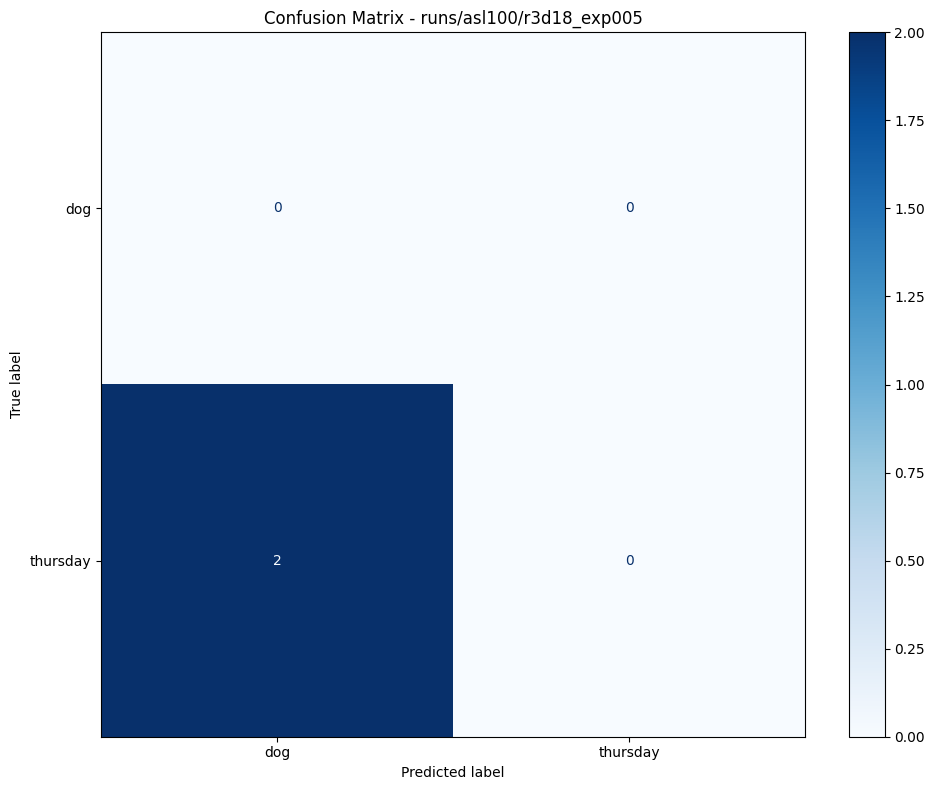

Confusion Matrix for runs/asl100/r3d18_exp006


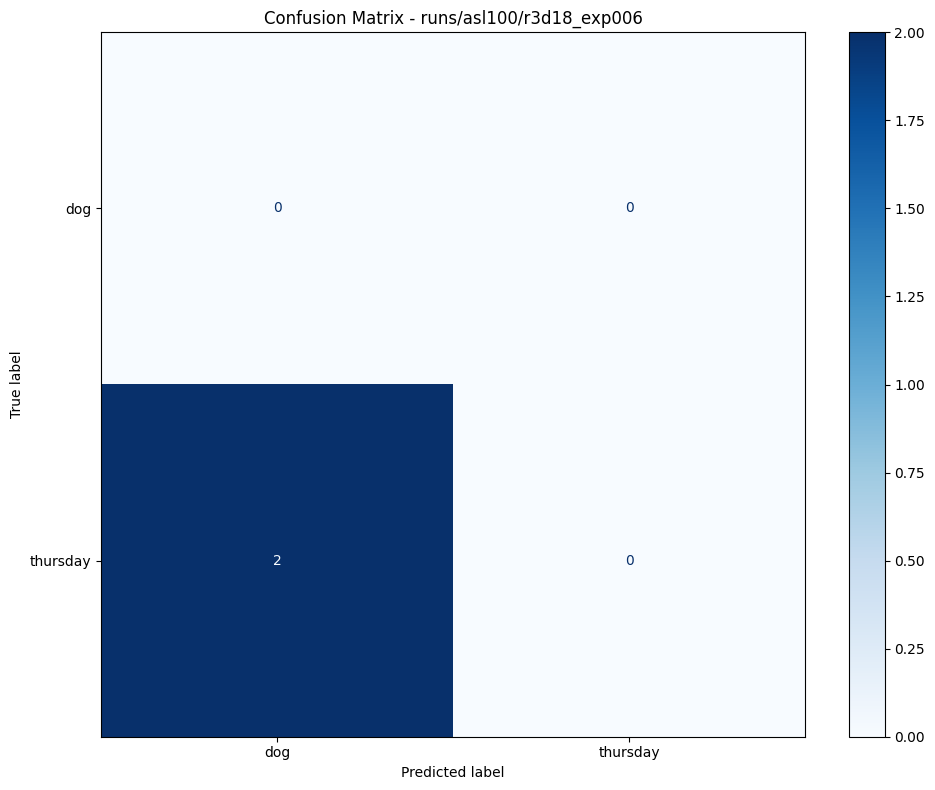

Confusion Matrix for runs/asl100/r3d18_exp007


/home/luke/miniconda3/envs/wlasl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


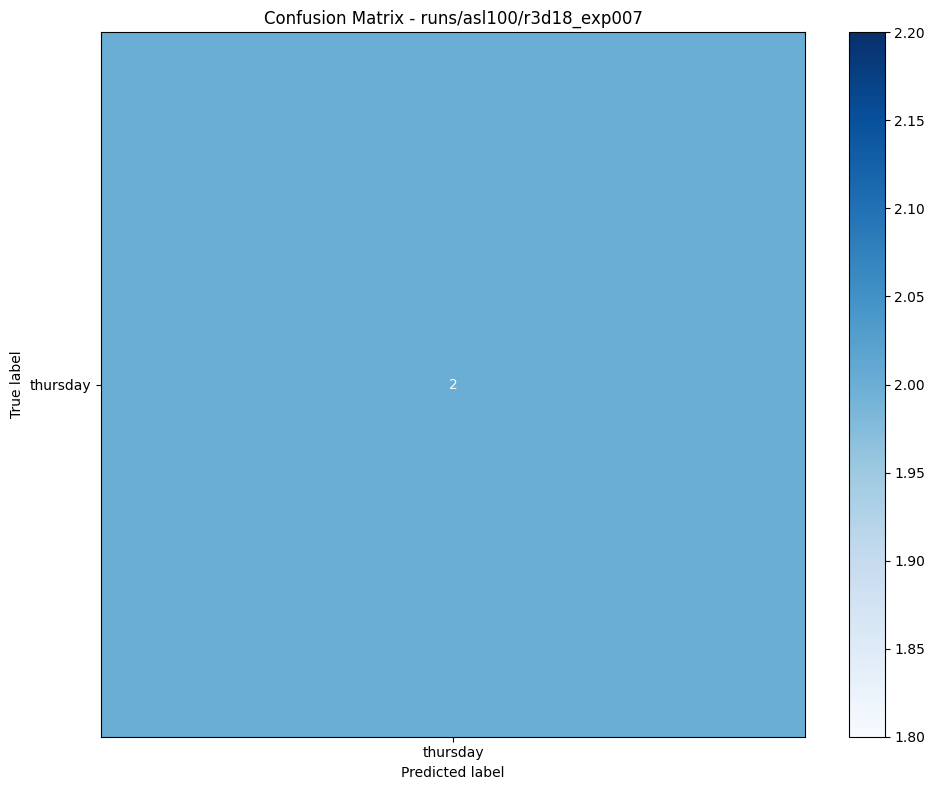

Confusion Matrix for runs/asl100/r3d18_exp008


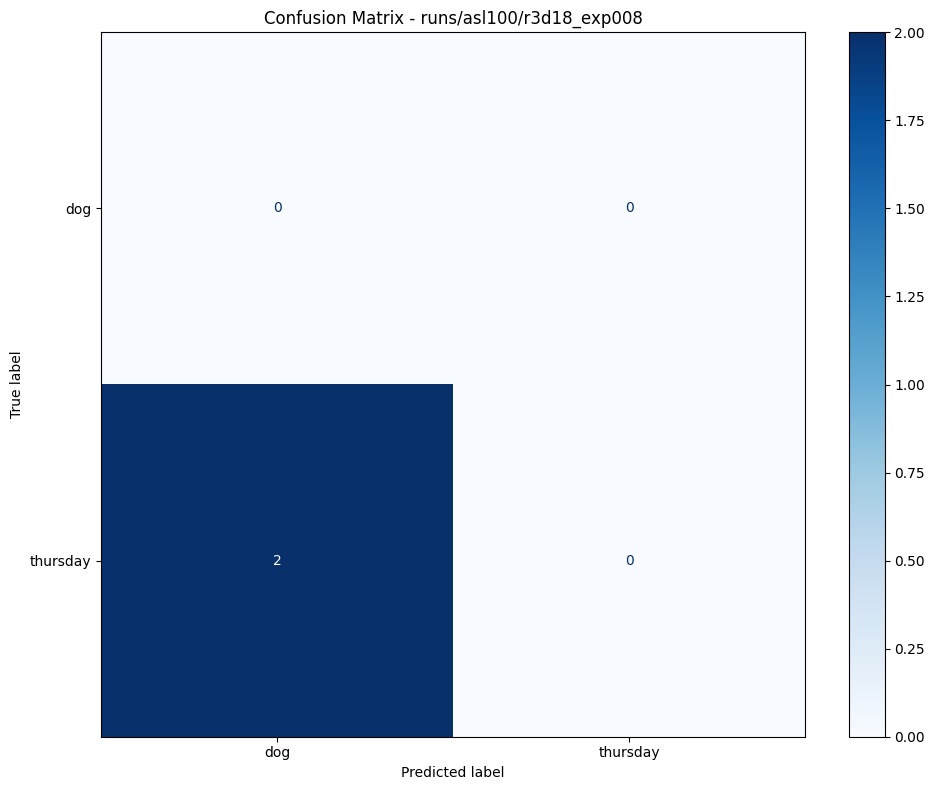

Confusion Matrix for runs/asl100/r3d18_exp009


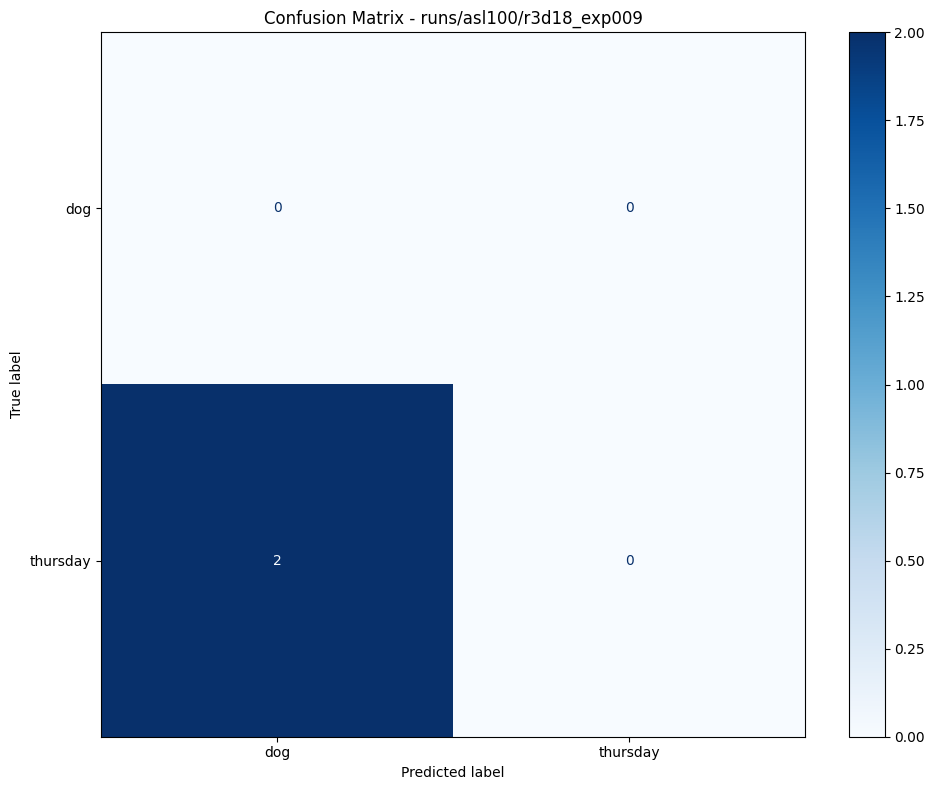

Confusion Matrix for runs/asl100/r3d18_exp010


/home/luke/miniconda3/envs/wlasl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


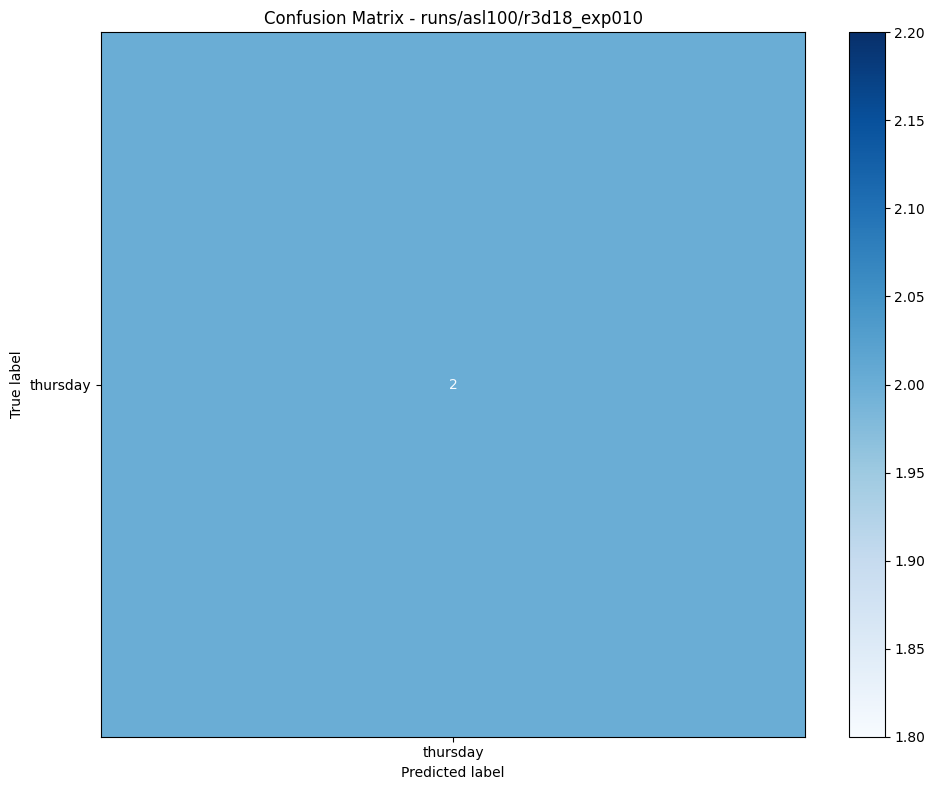

In [ ]:
for i, (model_name, predictions) in enumerate(zip([r['model_name'] for r in results], y_pred_all)):
  print(f"Confusion Matrix for {model_name}")
  test.plot_confusion_matrix(y_true_all, predictions, classes_path=classes_path, 
                        title=f'Confusion Matrix - {model_name}')